# Post analysis of results

Processing data for post analysis and presentation

**Original code:** [Alexandros Korkovelos](https://github.com/akorkovelos) <br />
**Conceptualization & Methodological review :**  [Alexandros Korkovelos](https://github.com/akorkovelos) <br />
**Updates, Modifications:** [Alexandros Korkovelos](https://github.com/akorkovelos) <br />
**Funding:** The World Bank (contract number: 7190531), [KTH](https://www.kth.se/en/itm/inst/energiteknik/forskning/desa/welcome-to-the-unit-of-energy-systems-analysis-kth-desa-1.197296)

In [1]:
# Importing necessary modules

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import pyproj
import os
import numpy as np
from earthpy import clip as cl
from shapely.geometry import Point, Polygon
%matplotlib inline

### Importing, projecting and Plotting basemap

In [2]:
path_shp = r"N:\Agrodem\Downscaling\Input_Data\vectors\gadm36_MOZ_shp"
name_shp = "gadm36_MOZ_2.shp"
admin_gdf = gpd.read_file(path_shp + "\\" + name_shp)

In [3]:
# Reproject data in to Ordnance Survey GB coordinates
admin_gdf_prj = admin_gdf.to_crs({'init': 'epsg:32737'})

C:\Users\adm.esa\Anaconda3\envs\OSMNX\lib\site-packages\pyproj\crs\crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


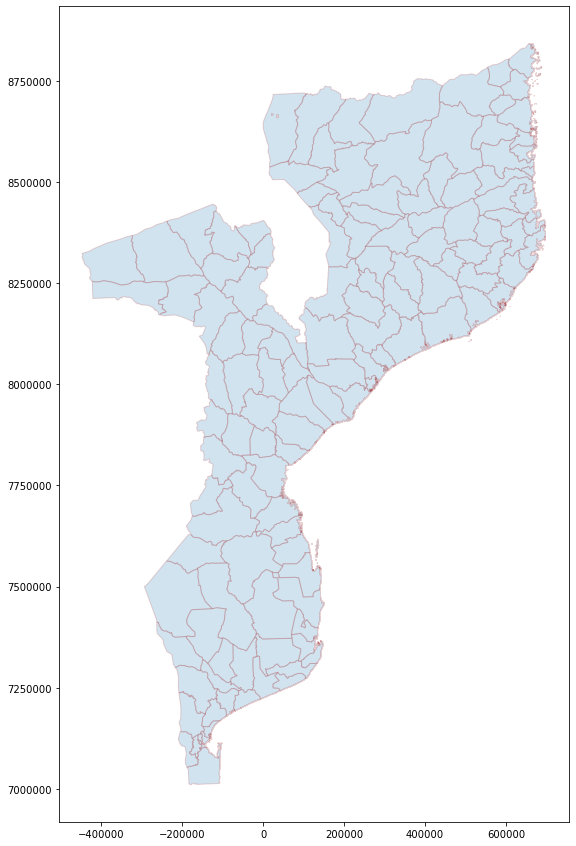

In [4]:
# Plot the data
fig, ax = plt.subplots(figsize=(15, 15))
admin_gdf_prj.plot(ax=ax, edgecolor='brown', alpha=0.2)
ax.set_aspect('equal', 'box')

# Save plot as figure 
#plt.savefig('Maize_Harv_Area_2017.png', bbox_inches='tight')

### Importing Agrodem result - setting geodf, projecting and plotting

In [5]:
# Import data 
path = r"N:\Agrodem\Irrigation_model\Output_data\agrodem_output"
name_of_file = "Moz_Maize_2017_1km_full_Results_full.csv"

In [6]:
# Import csv as pandas dataframe
result_gdf = pd.read_csv(path + "\\" + name_of_file)

In [7]:
result_gdf.head(4)

,Unnamed: 0,State,lon,lat,Crop,Fraction,harv_area,sw_depth,sw_dist,sw_suit,...,PD_E_gw_12,PD_E_sw_12,ED_E_gw_12,ED_E_sw_12,PD_E_gw_max,PD_E_sw_max,PD_E,gross_an_irrig_req,PWD_max,Annual_elec_demand
0,0,Ribaue,38.20326,-14.59745,Maize,0.015569,1.556914,437.0,2.791424,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1,Ribaue,38.30538,-14.59778,Maize,0.161039,16.103876,406.0,3.460645,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2,Ribaue,38.16605,-14.61541,Maize,0.069004,6.900440,444.0,2.076970,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,3,Ribaue,38.24961,-14.61569,Maize,0.317217,31.721685,429.0,1.366255,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [8]:
# Setting a geo dataframe - appointing geometry attribute
result_gdf['geometry'] = list(zip(result_gdf['lon'], result_gdf['lat']))
result_gdf['geometry'] = result_gdf['geometry'].apply(Point)
result_gdf = gpd.GeoDataFrame(result_gdf, geometry='geometry', crs={'init': 'epsg:4326'})

C:\Users\adm.esa\Anaconda3\envs\OSMNX\lib\site-packages\pyproj\crs\crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [9]:
result_gdf_prj = result_gdf.to_crs({'init': 'epsg:32737'})

In [10]:
result_gdf_prj.head(4)

,Unnamed: 0,State,lon,lat,Crop,Fraction,harv_area,sw_depth,sw_dist,sw_suit,...,PD_E_sw_12,ED_E_gw_12,ED_E_sw_12,PD_E_gw_max,PD_E_sw_max,PD_E,gross_an_irrig_req,PWD_max,Annual_elec_demand,geometry
0,0,Ribaue,38.20326,-14.59745,Maize,0.015569,1.556914,437.0,2.791424,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,POINT (414183.929 8386046.660)
1,1,Ribaue,38.30538,-14.59778,Maize,0.161039,16.103876,406.0,3.460645,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,POINT (425183.793 8386046.241)
2,2,Ribaue,38.16605,-14.61541,Maize,0.069004,6.900440,444.0,2.076970,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,POINT (410183.126 8384045.711)
3,3,Ribaue,38.24961,-14.61569,Maize,0.317217,31.721685,429.0,1.366255,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,POINT (419183.164 8384046.141)


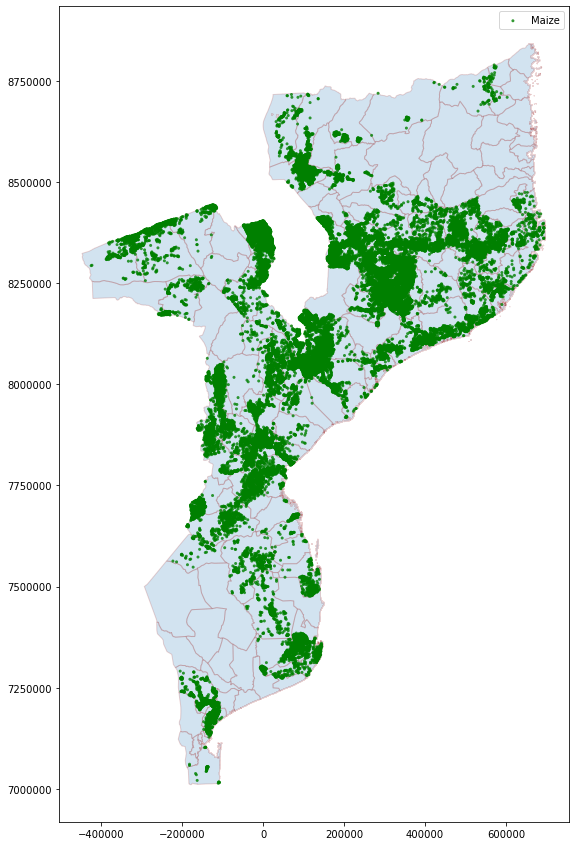

In [11]:
fig, ax = plt.subplots(figsize=(15, 15))
admin_gdf_prj.plot(ax=ax, edgecolor='brown', alpha=0.2)
result_gdf_prj.plot(ax=ax, color='green', edgecolor='none', figsize=(20, 20), alpha=0.8, label='Maize', marker='.')
#downscaled_maize_prj.plot(ax=ax, column='MaizeArea', figsize=(20, 20), alpha=0.8, label='Maize', legend = True)
ax.set_aspect('equal', 'box')
leg = ax.legend()
 
# Save plot as figure 
#plt.savefig('Maize_Harv_Area_2017.png', bbox_inches='tight')

In [12]:
#print(result_gdf_prj.columns.tolist())

Estimate harvested area per State

In [13]:
# Harvested area per state (ha/year)
harvest_per_state = result_gdf_prj.groupby(['State'])['harv_area'].sum()

Change yield if needed

In [14]:
## Update current yield if needed - Currently same yield for the whole country
#result_gdf_prj["curr_yield"] = result_gdf_prj["curr_yield"]
#
## Update potential yield if needed - Currently same yield for the whole country
#result_gdf_prj["max_yield"] = result_gdf_prj["max_yield"]

Estimate tonnes produced based on yields

In [15]:
# Estimate production in tonnes

result_gdf_prj["tons_p"] = result_gdf_prj["harv_area"]/1000*result_gdf_prj["curr_yield"]

In [16]:
# Asign crop yield based on whether has been irrigated - yield increase

result_gdf_prj["tons_p_irr"] = np.where(result_gdf_prj["Annual_elec_demand"] > 0, 
                                           result_gdf_prj["harv_area"]/1000*result_gdf_prj["curr_yield"],
                                           result_gdf_prj["harv_area"]/1000*result_gdf_prj["max_yield"])

In [17]:
ton_increase = result_gdf_prj["tons_p_irr"].sum() - result_gdf_prj["tons_p"].sum()

In [18]:
print ("Taking into account yield change in irrigated areas it is estimated that production will be increase by {t:.0f} tons, if irrigation does apply".format(t=ton_increase))

Taking into account yield change in irrigated areas it is estimated that production will be increase by 2602874 tons, if irrigation does apply


### Calculate electricity requirement for post-harvesting activities

In [19]:
# This is the per tonne electricity requirement (kWh/tonne) for post harvesting activities
# For maize post harvesting elec. requirements were estimated at ~0.2 kW/ha or 25 kWh/t crop processed (milling)
# For cassava post harvesting elec. requirements were estimated at ~0.04 kW/ha or ~4.2 kWh/t crop processed (drying + milling)
# For rice paddy post harvesting elec. requirements were estimated at ~0.03 kW/ha or 4 kWh/t crop processed (milling)

drying_req = 0                   # drying of harvested crop
milling_req = 25                # milling of harvested crop
chilling_req = 0                # refrigeration of either harvested crop or product
packing_req = 0                  # pachaging of product
other_req = 0                   # any other crop related post harvested activities to be included 

post_harv_dem = drying_req + milling_req + chilling_req + packing_req + other_req

In [20]:
result_gdf_prj["post_harv_req"] = result_gdf_prj["tons_p_irr"]*post_harv_dem

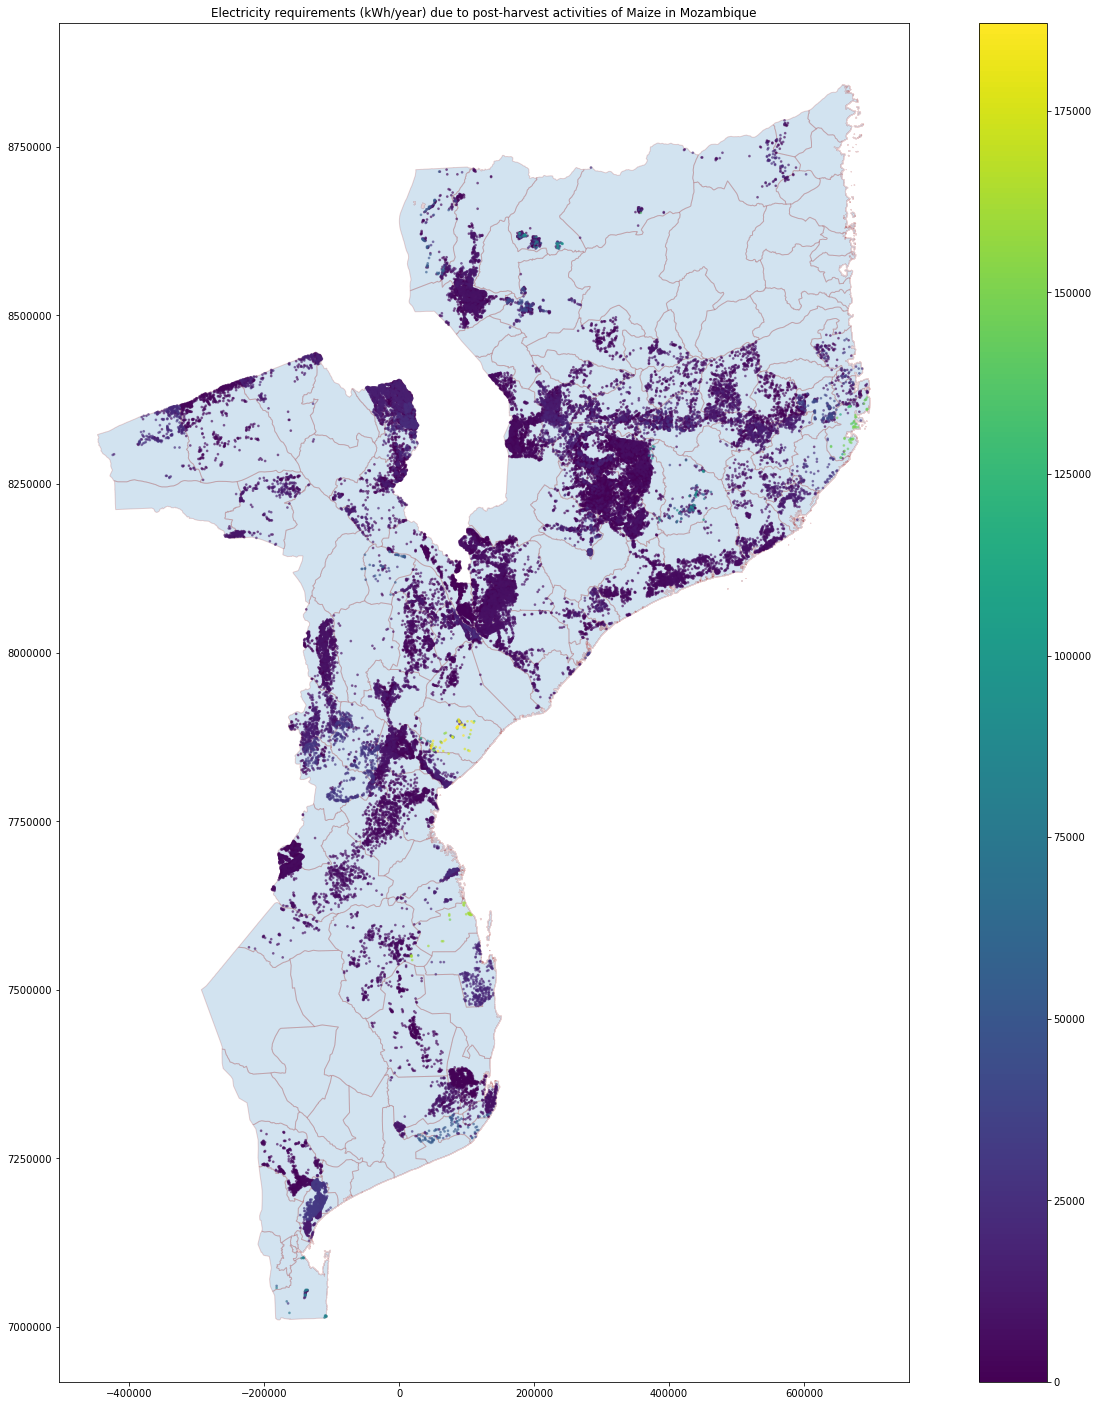

In [33]:
# Create the axis first
fig, ax = plt.subplots(figsize=(25, 25))
admin_gdf_prj.plot(ax=ax, edgecolor='brown', alpha=0.2)
result_gdf_prj.sort_values('post_harv_req', ascending=True).plot(ax=ax, column='post_harv_req', 
                                                                 legend=True, markersize=3, cmap="viridis",
                                                                 figsize=(20, 20), alpha=0.5)
#result_gdf_prj.plot()

# Make figure aspect ratio ensure that 10x10 km square appears square
ax.set_aspect('equal', 'box')
txt = ax.set_title('Electricity requirements (kWh/year) due to post-harvest activities of Maize in Mozambique'.format(""))

# Save plot as figure 
plt.savefig('Post-harvest Maize_2017_KWhperyear.png', bbox_inches='tight')

### Calsulating results per province

In [22]:
# post harvesting activity needs (kWh/year)
postharv_per_state = result_gdf_prj.groupby(['State'])['post_harv_req'].sum()

# Irrigation needs (m3/year)
irrigation_per_state = result_gdf_prj.groupby(['State'])['gross_an_irrig_req'].sum()

# Electricity needs kWh/year
elec_per_state = result_gdf_prj.groupby(['State'])['Annual_elec_demand'].sum()

In [23]:
admin_gdf_prj.rename(columns={'NAME_2': 'State'}, inplace=True)
admin_gdf_prj['State'].unique()

array(['Ancuabe', 'Balama', 'Chiure', 'Macomia', 'Mecufi', 'Meluco',
       'Mocimboa_da_Praia', 'Montepuez', 'Mueda', 'Muidumbe', 'Namuno',
       'Nangade', 'Palma', 'Pemba', 'Quissanga', 'Bilene', 'Chibuto',
       'Chicualacuala', 'Chigubo', 'Chokwe', 'Guija', 'Mabalane',
       'Mandlakazi', 'Massangena', 'Massingir', 'Xai_Xai', 'Funhalouro',
       'Govuro', 'Homoine', 'Inharrime', 'Inhassoro', 'Jangamo', 'Mabote',
       'Massinga', 'Morrumbene', 'Panda', 'Vilanculos', 'Zavala', 'Barue',
       'Gondola', 'Guro', 'Machaze', 'Macossa', 'Manica', 'Mossurize',
       'Sussundenga', 'Tambara', 'Boane', 'Magude', 'Manhica',
       'Marracuene', 'Matutuine', 'Moamba', 'Namaacha', 'Maputo',
       'Angoche', 'Erati', 'Lalaua', 'Malema', 'Meconta', 'Mecuburi',
       'Memba', 'Mogovolas', 'Moma', 'Monapo', 'Mongincual', 'Mossuril',
       'Muecate', 'Murrupula', 'Nacala_Velha', 'Namapa', 'Nampula',
       'Ribaue', 'Cuamba', 'Lago', 'Lichinga', 'Majune', 'Mandimba',
       'Marrupa', 'M

In [24]:
# Merge irrigation
irrigation_per_state_map = pd.merge(admin_gdf_prj, irrigation_per_state, how='left', on=['State'])
irrigation_per_state_map.gross_an_irrig_req.fillna(0, inplace=True)

# Merge electricity
elec_per_state_map = pd.merge(admin_gdf_prj, elec_per_state, how='left', on=['State'])
elec_per_state_map.Annual_elec_demand.fillna(0, inplace=True)

# Merge post harvest
postharv_per_state_map = pd.merge(admin_gdf_prj, postharv_per_state, how='left', on=['State'])
postharv_per_state_map.post_harv_req.fillna(0, inplace=True)

In [25]:
# Changing units from kWh/year to MWh/year
elec_per_state_map["Annual_elec_demand"] /= 1000
postharv_per_state_map["post_harv_req"] /= 1000

In [26]:
elec_per_state_map.Annual_elec_demand.unique()

array([0.00000000e+00, 2.10327921e-03, 2.22151740e+02, 7.23225155e+02,
       1.97255453e+02, 4.60333588e-01, 1.96461531e-01, 1.04166377e-01,
       5.30811160e+02, 5.99157783e-02, 3.34326436e-01, 1.88687611e+02,
       4.90162792e+00, 1.84381398e+02, 4.49833886e+02, 3.83023716e+02,
       8.04607349e-03, 4.20413414e+01, 9.74079250e+00, 2.39728926e+03])

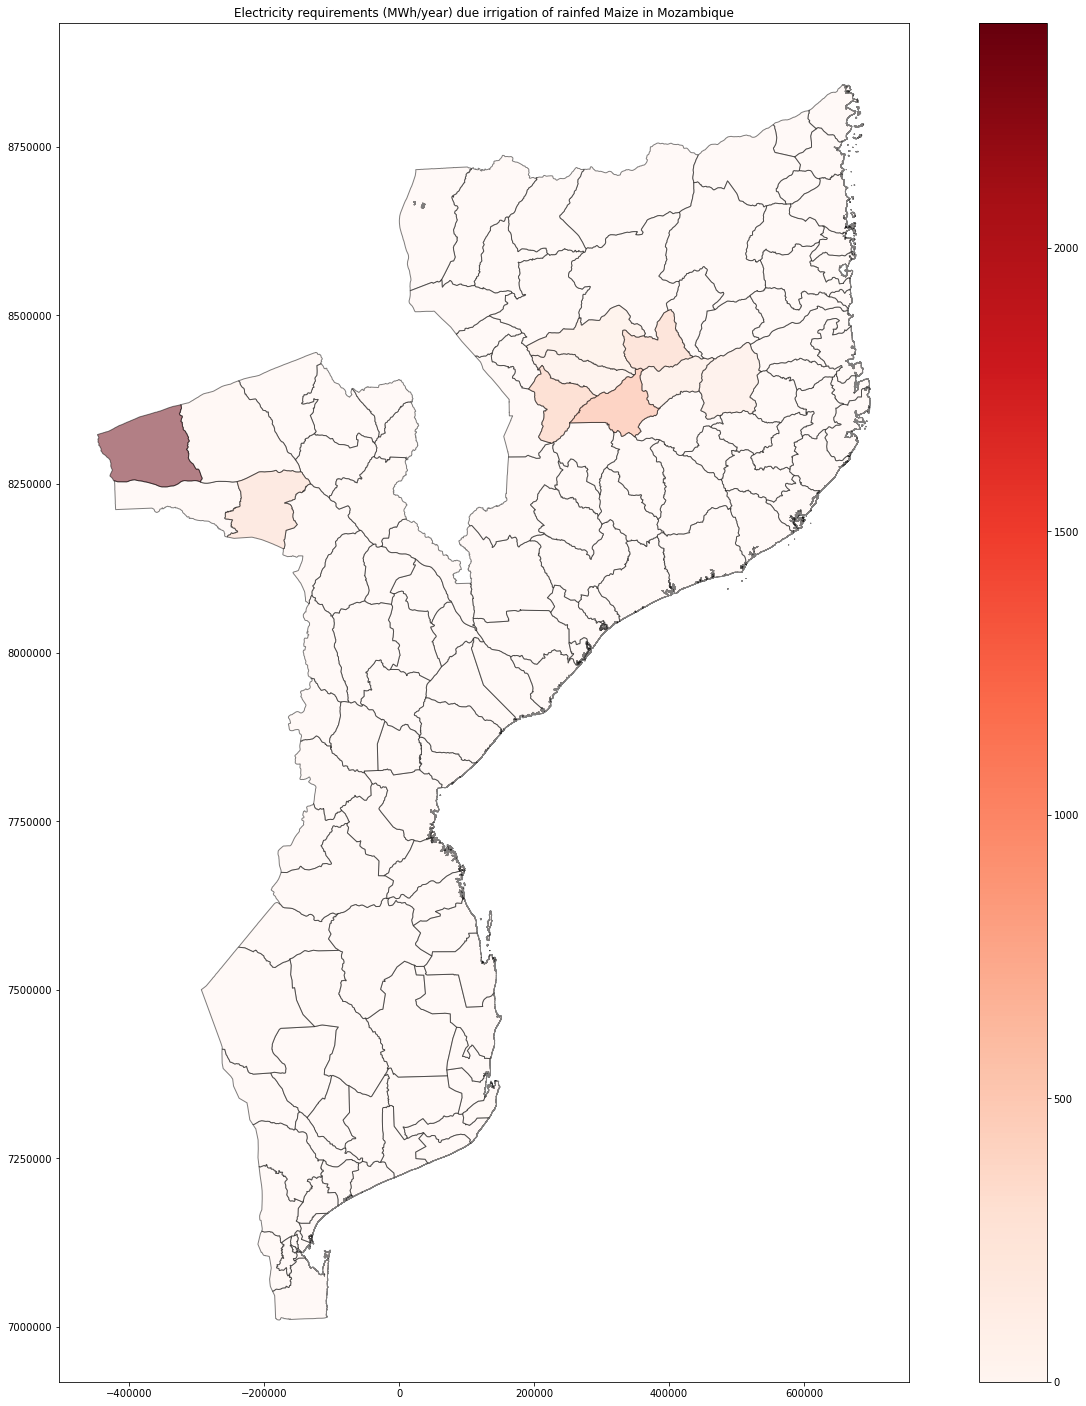

In [27]:
# Create the axis first
fig, ax = plt.subplots(figsize=(25, 25))
#admin_gdf_prj.plot(ax=ax, edgecolor='brown', alpha=0.2)
elec_per_state_map.sort_values('Annual_elec_demand', ascending=True).plot(ax=ax, column='Annual_elec_demand', legend=True, cmap="Reds", edgecolor='black', figsize=(20, 20), alpha=0.5)

# Make figure aspect ratio ensure that 10x10 km square appears square
ax.set_aspect('equal', 'box')
txt = ax.set_title('Electricity requirements (MWh/year) due irrigation of rainfed Maize in Mozambique'.format(""))

# Save plot as figure 
plt.savefig('Maize_2017_MWhperyear.png', bbox_inches='tight')

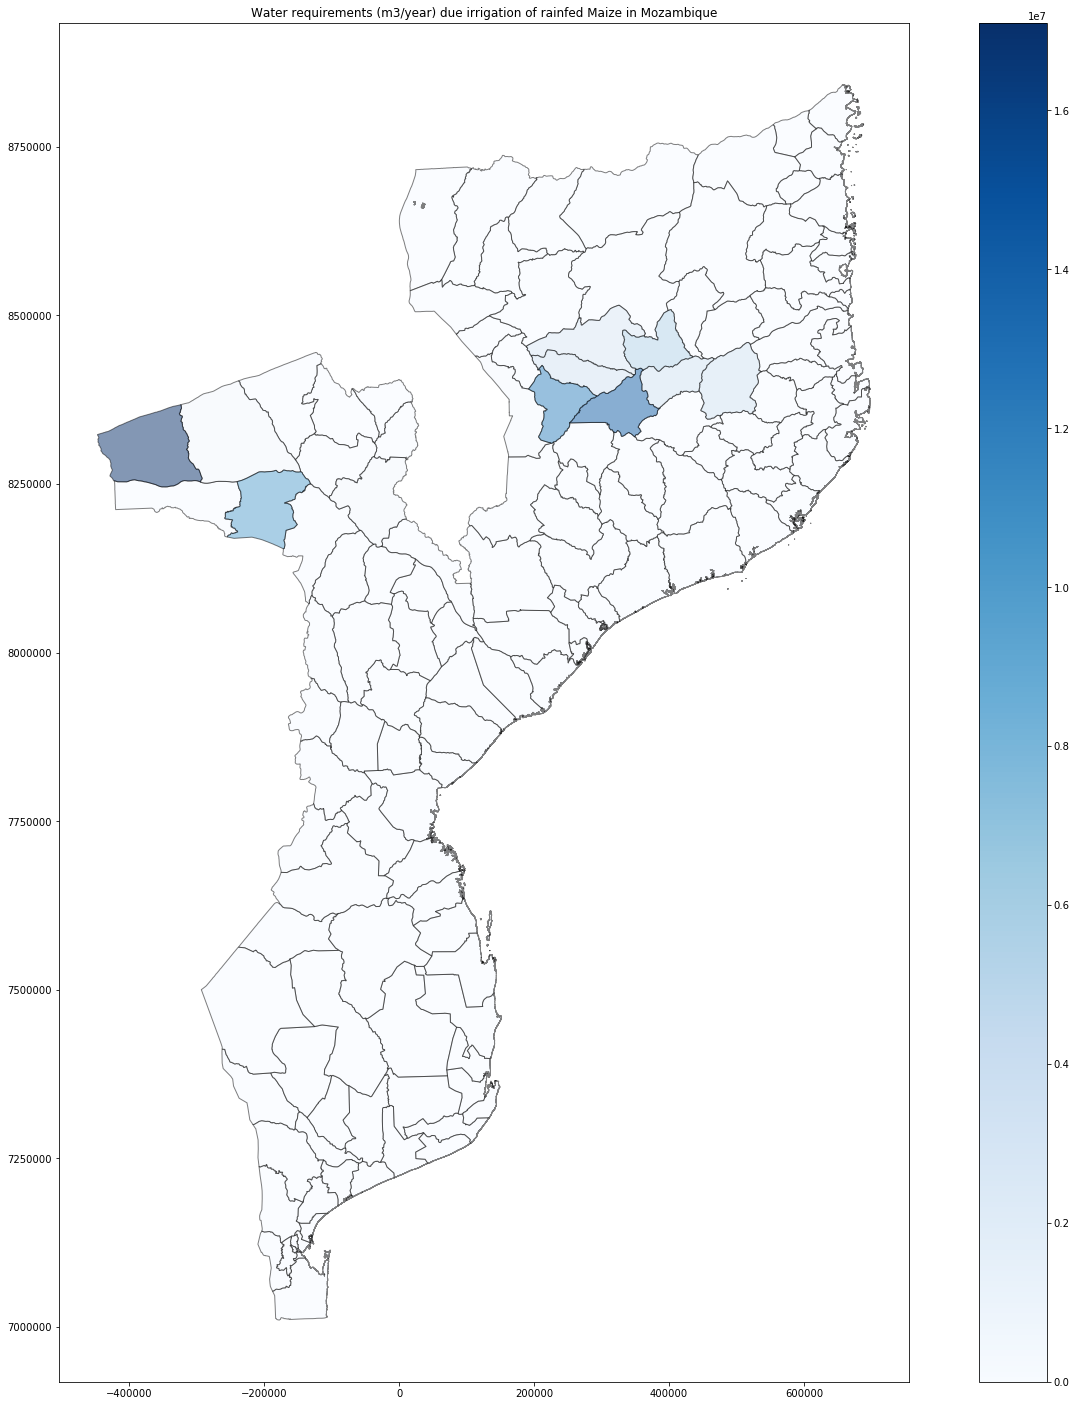

In [28]:
# Create the axis first
fig, ax = plt.subplots(figsize=(25, 25))
#admin_gdf_prj.plot(ax=ax, edgecolor='brown', alpha=0.2)
irrigation_per_state_map.sort_values('gross_an_irrig_req', ascending=True).plot(ax=ax, column='gross_an_irrig_req', legend=True, cmap="Blues", edgecolor='black', figsize=(20, 20), alpha=0.5)

# Make figure aspect ratio ensure that 10x10 km square appears square
ax.set_aspect('equal', 'box')
txt = ax.set_title('Water requirements (m3/year) due irrigation of rainfed Maize in Mozambique'.format(""))

# Save plot as figure 
plt.savefig('Maize_2017_irrm3peryear.png', bbox_inches='tight')

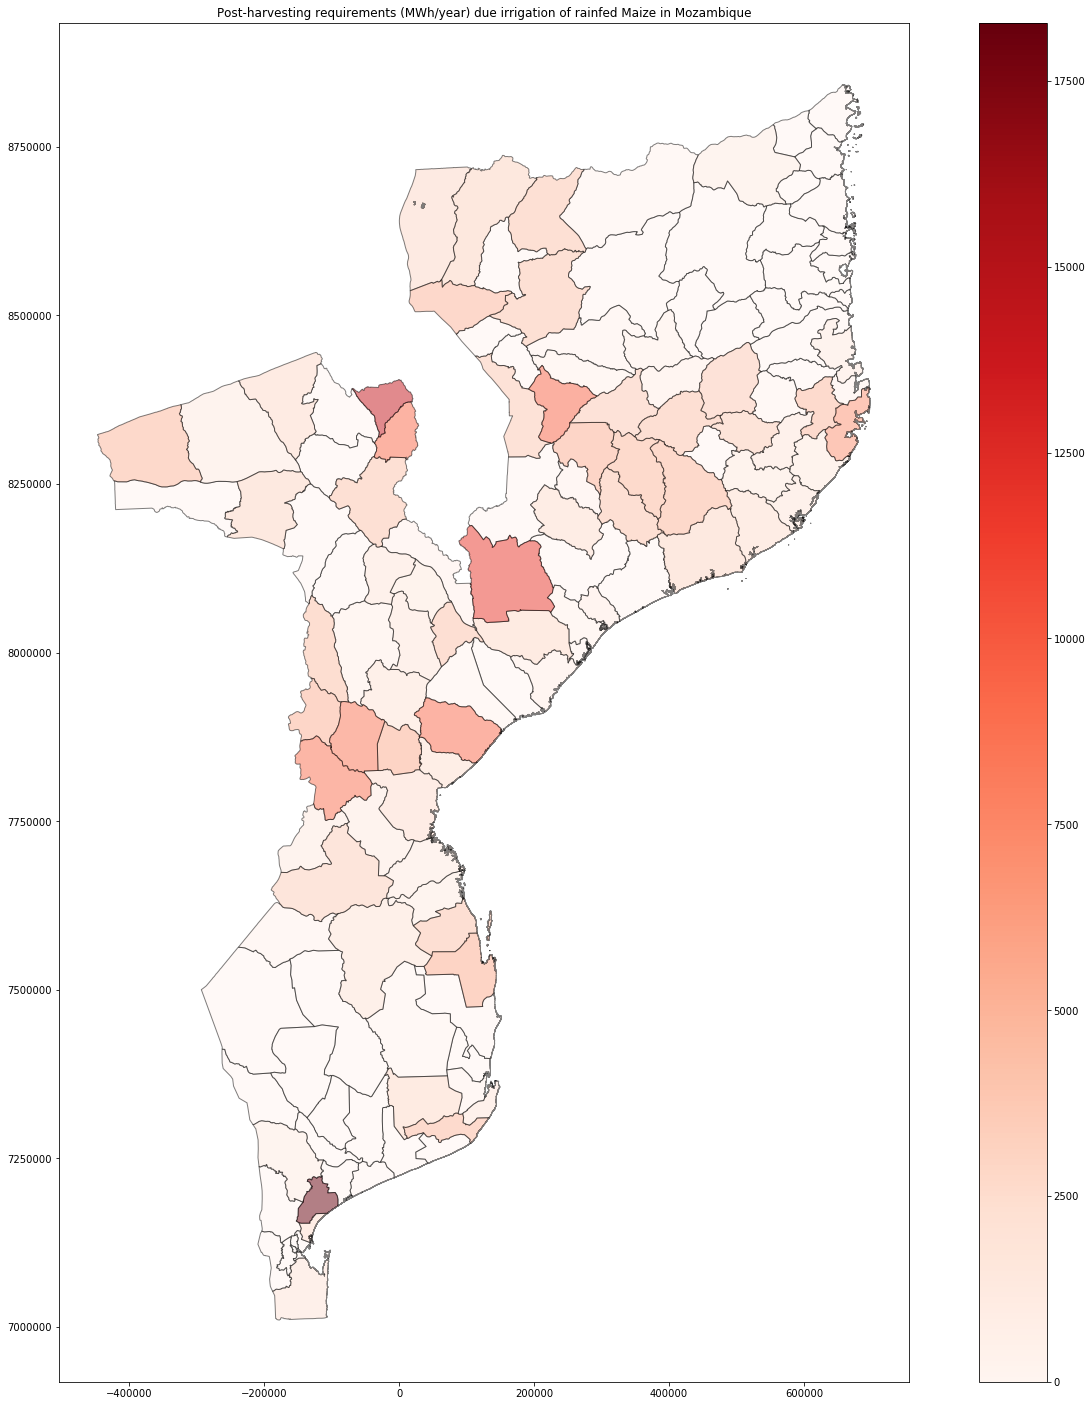

In [29]:
# Create the axis first
fig, ax = plt.subplots(figsize=(25, 25))
#admin_gdf_prj.plot(ax=ax, edgecolor='brown', alpha=0.2)
postharv_per_state_map.sort_values('post_harv_req', ascending=True).plot(ax=ax, column='post_harv_req', legend=True, cmap="Reds", edgecolor='black', figsize=(20, 20), alpha=0.5)

# Make figure aspect ratio ensure that 10x10 km square appears square
ax.set_aspect('equal', 'box')
txt = ax.set_title('Post-harvesting requirements (MWh/year) due irrigation of rainfed Maize in Mozambique'.format(""))

# Save plot as figure 
plt.savefig('Maize_2017_post_mwhperyear.png', bbox_inches='tight')

### Exporting results as table

In [30]:
# List of states from dataframe
list_of_states = irrigation_per_state_map.State.unique()

# Create a dict using state name as keys
state_results = { i : len(list_of_states) for i in list_of_states }

# Assigning total elec. requirement for irrigatio, post harvest asctivities and total water requirements
for key , value in state_results.items():
    state_results[key] = (elec_per_state_map [(elec_per_state_map .State == key)]["Annual_elec_demand"].sum(),
                          postharv_per_state_map [(postharv_per_state_map .State == key)]["post_harv_req"].sum(),
                          irrigation_per_state_map[(irrigation_per_state_map.State == key)]["gross_an_irrig_req"].sum())

In [31]:
state_results_df = pd.DataFrame(state_results.values(), index=state_results.keys(), columns=['MWh_Irr','MWh_post_h', "m3"])

In [32]:
state_results_df

,MWh_Irr,MWh_post_h,m3
Ancuabe,0.0,0.000000,0.0
Balama,0.0,0.000000,0.0
Chiure,0.0,0.000000,0.0
Macomia,0.0,0.000000,0.0
Mecufi,0.0,0.000000,0.0
...,...,...,...
Morrumbala,0.0,11842.538182,0.0
Namacurra,0.0,1093.499153,0.0
Namarroi,0.0,690.357145,0.0
Nicoadala,0.0,623.414694,0.0


### Exporting result to csv

In [229]:
out_path = r"N:\Agrodem\Irrigation_model\Output_data\agrodem_output"
name = "Moz_maize_2017_1km_Summary_state_results"
state_results_df.to_csv(os.path.join(out_path,"{c}.csv".format(c=name)))